David Regev
204813323

# Retinopathy

## import and preperation of the data

In [1]:
import lifelines as ll
import pandas as pd
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
%matplotlib inline

In [2]:
rt = pd.read_excel('data.xlsx')
first_laser_type = rt[rt['laser_type'] == 1]
second_laser_type = rt[rt['laser_type'] == 2]

## The data is almost equally divided by the laser type of treatment

In [3]:
print('First laser type is: {}\n'.format(len(first_laser_type)), 'Second laser type is: {}'.format(len(second_laser_type)))

First laser type is: 101
 Second laser type is: 99


# We consider two subjects:
## - The performance of a treatment
## - Which treatment is better

# Are The Treatments Prevent Retinopathy?
### The null hypothesis is that the treatments<br>are not significantly preventing retinopathy

## Laser treated VS untreated eyes
The probabilty to prevent retinopathy is approximately 30% greater than do nothing.

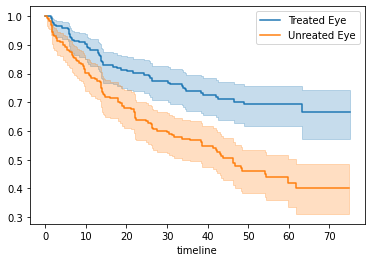

In [4]:
km = ll.KaplanMeierFitter()
x = km.fit(rt['tr_time'], rt['tr_status']).plot(label='Treated Eye')
y = km.fit(rt['untr_time'], rt['untr_status']).plot(label='Unreated Eye')

## Log-Rank test for the laser treatments
The p-value is less than 0.05 so the null hypothesis is rejected.<br>
It is better to have a treatment than don't.

In [5]:
results = logrank_test(rt['tr_time'], rt['untr_time'], rt['tr_status'], rt['untr_status'])
results.print_summary()

# Is this result right for both treatments?

## First laser treated VS untreated eyes
The probabilty to prevent retinopathy is approximately 35% greater than do nothing.

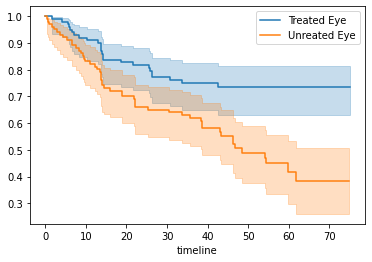

In [6]:
x = km.fit(first_laser_type['tr_time'], first_laser_type['tr_status']).plot(label='Treated Eye')
y = km.fit(first_laser_type['untr_time'], first_laser_type['untr_status']).plot(label='Unreated Eye')

## Log-Rank test for the first laser treatment
The p-value is less than 0.05 so the null hypothesis is rejected.<br>
It is better to have this treatment than don't.

In [7]:
results = logrank_test(first_laser_type['tr_time'], first_laser_type['untr_time'], first_laser_type['tr_status'], first_laser_type['untr_status'])
results.print_summary()

## Second laser treated VS untreated eyes
The probabilty to prevent retinopathy is approximately 15% greater than do nothing.

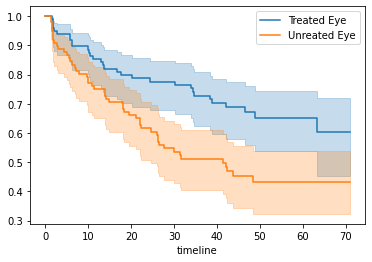

In [8]:
x = km.fit(second_laser_type['tr_time'], second_laser_type['tr_status']).plot(label='Treated Eye')
y = km.fit(second_laser_type['untr_time'], second_laser_type['untr_status']).plot(label='Unreated Eye')

## Log-Rank test for the second laser treatment
The p-value is less than 0.05 so the null hypothesis is rejected.<br>
It is better to have this treatment than don't.

In [9]:
results = logrank_test(second_laser_type['tr_time'], second_laser_type['untr_time'], second_laser_type['tr_status'], second_laser_type['untr_status'])
results.print_summary()

# Conclusions:
1. Treatment is better than doing nothing.
2. Both treatments are better than doing nothing.

# Performance comparison between the lasers treatnents
## The null hypothesis is that both lasers perform approximately the same.

### Comparison between both lasers untreated eyes
Same behaviour for both untreated groups

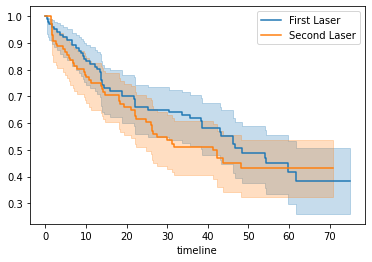

In [10]:
km.fit(first_laser_type['untr_time'], first_laser_type['untr_status']).plot(label='First Laser')
km.fit(second_laser_type['untr_time'], second_laser_type['untr_status']).plot(label='Second Laser')

### Comparison between both lasers treated eyes
The first laser treatment is slightly better than the second<br>
in the short term and approximately 15% better in the long term

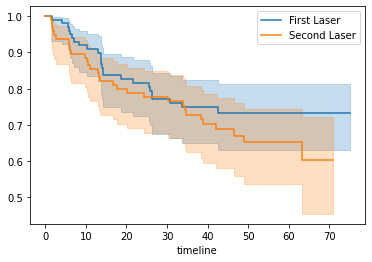

In [11]:
km.fit(first_laser_type['tr_time'], first_laser_type['tr_status']).plot(label='First Laser')
km.fit(second_laser_type['tr_time'], second_laser_type['tr_status']).plot(label='Second Laser')

## Log-Rank test
The p-value is greater than 0.05, so the null hypothesis is true.

In [12]:
results = logrank_test(first_laser_type['tr_time'], second_laser_type['tr_time'], first_laser_type['tr_status'], second_laser_type['tr_status'])
results.print_summary()

# Cox HP test
we can see that the laser type is not significant at 0-time when the treatment started<br>
which converges to our result that both lasers perform approximately the same.<br>
Actually, by this test, no feature is significant although the concordance is not bad.

In [14]:
cph_rt = rt[['laser_type', 'age', 'type', 'tr_group', 'untr_group', 'tr_time', 'tr_status']]
cph = ll.CoxPHFitter()
cph.fit(cph_rt, duration_col = 'tr_time', event_col = 'tr_status')
cph.print_summary()

# Conclusion:
Both treatments prevent retinopathy approximately the same,<br>
although the first laser treatment is somewhat prevent better in the long term